kmp 2023

Based on **Lauwens & Downey "Think Julia: How to Think Like a Computer Scientist"** 
https://benlauwens.github.io/ThinkJulia.jl/latest/book.html

Resources:

Julia webpage https://julialang.org/ 

Julia documentation https://docs.julialang.org/en/v1/


In [1]:
#==

import Pkg
Pkg.add("ImageIO")
Pkg.add("ImageShow")
Pkg.add("FileIO")
# Pkg.add("PNGFiles")

==#

In [2]:
using ImageIO, ImageShow, FileIO

## Chapter 05 -- Conditionals and Recursion

https://benlauwens.github.io/ThinkJulia.jl/latest/book.html#chap05

### Integer division, modulus operator and remainder

The **floor division operator, ÷ (\div <tab>)**, divides two numbers and rounds down to an integer. Conventional division returns a **floating-point number**:

```Julia
	julia> minutes = 105
		105

	julia> minutes / 60
		1.75
```

But we do not normally write hours with decimal points. Floor division returns the **integer** number of hours, rounding towards zero:

```Julia
	julia> hours = minutes ÷ 60
		1

	julia> -119 ÷ 2
		-59
```

To get the **remainder**, you could subtract off one hour in minutes:

```Julia
	julia> remainder = minutes - hours * 60
		45
```

An alternative is to use the **modulus operator**, **%**, which divides two numbers and **returns the remainder**.

```Julia
	julia> remainder = minutes % 60
		45
```

The modulus operator is more useful than it seems. For example, you can check whether one number is divisible by another—if x % y is zero, then x is divisible by y. Also, you can extract the right-most digit or digits from a number. For example, x % 10 yields the right-most digit of an integer x (in base 10). Similarly x % 100 yields the last two digits.

And do not forget:

In [3]:
minutes = 105
k, r = divrem(minutes, 60)   # tuple assignment k, r = ...

(1, 45)

### Boolean Expressions

A boolean expression is an expression that is either true or false (evaluates to the **type Bool**, **true** or **false**). The following examples use the operator **`==`**, which compares two operands and produces true if they are equal and false otherwise:

```Julia
	julia> 5 == 5
		true

	julia> 5 == 6
		false
```

true and false are special values that belong to the type **Bool**; they are not strings:

```Julia
	julia> typeof(true)
		Bool

	julia> typeof(false)
		Bool
```

### Relational Operators

The **`==` operator** is one of several **relational operators**:

```Julia
      `x != y`               # x is not equal to y
      `x ≠ y`                # (\ne<TAB>)
      `x > y`                # x is greater than y
      `x < y`                # x is less than y
      `x >= y`               # x is greater than or equal to y
      `x ≥ y`                # (\ge<TAB>)
      `x <= y`               # x is less than or equal to y
      `x ≤ y`                # (\le<TAB>)
```

A common error is to use a single equal sign **`=`** instead of a double equal sign **`==`**, **`=` is the assignment operator and `==` is the relational operator `isequal`.** 


### Logical Operators

There are three logical operators in Julia: **`&&`** (and), **`||`** (or), and **`!`** (not).

The semantics (meaning) of these operators is similar to their meaning in English. For example, `x > 0 && x < 10` is true if and only if x is greater than 0 and less than 10. 

`n % 2 == 0 || n % 3 == 0` is true if either or both of the conditions is true, that is, if the number is divisible by 2 or 3.

Both **`&&` and `||` associate to the right**, but **`&&`** has higher **precedence** than **`||`** does.

Finally, the **`!`** operator negates a boolean expression, so **`!(x > y)`** is true iff x > y is false, that is, iff x is less than or equal to y.

### Conditional Execution

In order to write useful programs, we need the ability to check conditions and change the behavior of the program accordingly. **Conditional statements** give us this ability. The simplest form is the **if statement**:

```Julia
	if x > 0
		println("x is positive")
	end
```

The **boolean expression** after if is called the **condition**. If it is true, the indented statement runs. If not, nothing happens.

**`if statements`** have the same structure as function definitions: **a header followed by body terminated with the keyword end**. Statements like this are called **compound statements**.

There is no limit on the number of statements that can appear in the body. Occasionally, it is useful to have a body with no statements, for example, as a place keeper for code you have not written yet.

```Julia
	if x < 0
		# TODO: need to handle negative values!
	end
```

### Alternative Execution

A second form of the if statement allows **alternative execution** or **conditional branching**, in which there are two possibilities and the condition determines which one runs. The syntax looks like this:

```Julia
	if x % 2 == 0
		println("x is even")
	else
		println("x is odd")
	end
```

If the remainder when x is divided by 2 is 0, then we know that x is even, and the program displays an appropriate message. If the condition is false, the second set of statements runs. Since the condition must be true or false, exactly one of the alternatives will run. The alternatives are called **branches**, because they are **branches in the flow of execution**.

### Chained Conditionals

Sometimes there are more than two possibilities and we need more than two branches. One way to express a computation like that is a chained conditional:

```Julia
	if x < y
		println("x is less than y")
	elseif x > y
		println("x is greater than y")
	else
		println("x and y are equal")
	end
```

Again, exactly one branch will run. There is no limit on the number of **`elseif statements`**. If there is an **`else clause`** (optional), it has to be at the end, but there does not have to be one.

```Julia
	if choice == "a"
		draw_a()
	elseif choice == "b"
		draw_b()
	elseif choice == "c"
		draw_c()
	end
```

**Each condition is checked in order.** If one of them is true, the corresponding branch runs and the statement ends. **Even if more than one condition is true, only the first true branch runs.**

### Nested Conditionals

One conditional can also be nested within another. We could have written the example in the previous section like this:

```Julia
	if x == y
		println("x and y are equal")
	else

		if x < y
			println("x is less than y")
		else
			println("x is greater than y")
		end

	end
```

The outer conditional contains two branches. The first branch contains a simple statement. The second branch contains another if statement, which has two branches of its own.

Logical operators often provide a way to simplify nested conditional statements. For example, we can rewrite the following code using a single conditional:

```Julia
	if 0 < x
		if x < 10
			println("x is a positive single-digit number.")
		end
	end
```

The print statement runs only if we make it past both conditionals, so we can get the same effect with the && operator:

```Julia
	if 0 < x && x < 10
		println("x is a positive single-digit number.")
	end
```

For this kind of condition, Julia provides a more concise syntax:

```Julia
	if 0 < x < 10
		println("x is a positive single-digit number.")
	end
```

### Recursion

It is legal for one function to call another; **it is also legal for a function to call itself**. It may not be obvious why that is a good thing, but it turns out to be effective in certain circumstances. 

For example, look at the following function:

In [4]:
function countdown(n)
    if n ≤ 0
        println("Blastoff!")
    else
        print(n, " ")
        countdown(n-1)
    end
end

countdown(3)

3 2 1 Blastoff!


If n is 0 or negative, it outputs the word, "Blastoff!" Otherwise, it outputs n and then calls a function named countdown—itself—passing n-1 as an argument. What happens if we call this function like this?

The execution of countdown begins with n = 3, and since n is greater than 0, it outputs the value 3, and then calls itself … the execution of countdown begins with n = 2, and since n is greater than 0, it outputs the value 2, and then calls itself … the execution of countdown begins with n = 1, and since n is greater than 0, it outputs the value 1, and then calls itself … the execution of countdown begins with n = 0, and since n is not greater than 0, it outputs the word, "Blastoff!" and then returns. The countdown that got n = 1 returns. The countdown that got n = 2 returns. The countdown that got n = 3 returns. And then you are back in Main.

A function that calls itself is **recursive**; the process of executing it is called **recursion**.

As another example, we can write a function that prints a string n times:

In [5]:
function printn(s, n)
    if n ≤ 0
        return
    end
    
    println(s)
    printn(s, n-1)		# recursive call
end
    
printn(11, 3)

11
11
11


If n ≤ 0 the return statement exits the function. The flow of execution immediately returns to the caller, and the remaining lines of the function do not run. The rest of the function is similar to countdown: it displays s and then calls itself to display s n−1 additional times. So the number of lines of output is 1+(n−1), which is n. 

For simple examples like this, it is probably easier to use a for loop. But we will see examples later that are hard to write with a for loop and easy to write with recursion, so it is good to start early.

### Stack Diagrams for Recursive Functions

In **Stack Diagrams**, we used a stack diagram to represent the state of a program during a function call. The same kind of diagram can help interpret a recursive function.

Every time a function gets called, Julia creates a frame to contain the function’s local variables and parameters. For a recursive function, there might be more than one frame on the stack at the same time.


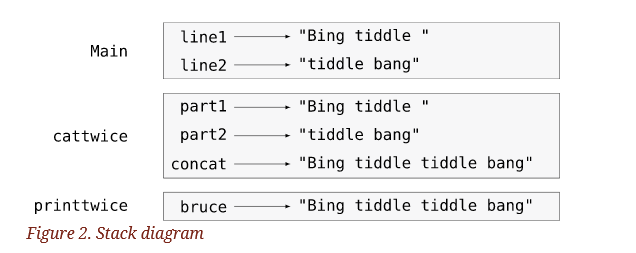

In [8]:
load("stack-diagram.png")

### Infinite Recursion

If a recursion never reaches a **base case**, it goes on making recursive calls forever, and the program never terminates. This is known as **infinite recursion**, and it is generally not a good idea. Here is a minimal program with an infinite recursion:

```Julia
	function recurse()
		recurse()
	end
```

In most programming environments, a program with infinite recursion does not really run forever. Julia reports an error message when the maximum recursion depth is reached:

```Julia
	julia> recurse()
		ERROR: StackOverflowError:
		Stacktrace:
		 [1] recurse() at ./REPL[1]:2 (repeats 80000 times)
```

This stacktrace is a little bigger than the one we saw in the previous chapter. When the error occurs, there are 80000 recurse frames on the stack. If you encounter an infinite recursion by accident, review your function to confirm that there is a base case that does not make a recursive call. And if there is a base case, check whether you are guaranteed to reach it.

### Keyboard Input

The programs we have written so far accept no input from the user. They just do the same thing every time. Julia provides a built-in function called **readline** that stops the program and waits for the user to type something. When the user presses RETURN or ENTER, the program resumes and readline returns what the user typed as a string -- echoing the input.

```Julia
	julia> text = readline()
		What are you waiting for?
		"What are you waiting for?"
```

Before getting input from the user, it is a good idea to print a prompt telling the user what to type:

```Julia
	julia> print("What...is your name? "); readline()
		What...is your name? Arthur, King of the Britons!
		"Arthur, King of the Britons!"
```

A **semi-colon `;`** allows to put multiple statements on the same line. In the REPL only the last statement returns its value.

If you expect the user to type an integer, you can try to convert the return value to Int64 with **parse** to achieve the desired type conversion:

```Julia
	julia> println("What is the velocity of an unladen swallow?"); 
			speed = readline()
		What is the airspeed velocity of an unladen swallow?
		42
		"42"

	julia> parse(Int64, speed)
		42
```

But if the user types something other than a **string of digits**, you get an error:

```Julia
	julia> println("What is the velocity of an unladen swallow? "); 
			speed = readline()
		What is the airspeed velocity of an unladen swallow?
		What do you mean, an African or a European swallow?
		"What do you mean, an African or a European swallow?"

	julia> parse(Int64, speed)
		ERROR: ArgumentError: invalid base 10 digit 'W' in 
			"What do you mean, an African or a European swallow?"
		[...]
```

Read error messages carefully, but do not assume that everything stated is correct.

### Debugging

When a syntax or runtime error occurs, the error message contains a lot of information that can be overwhelming. The most useful parts are usually:

- what kind of error it was
- where it occurred

Syntax errors are usually easy to find. In general, error messages indicate where the problem was discovered, but the actual error might be earlier in the code, sometimes on a previous line. The same is true of runtime errors. 

Suppose you are trying to compute a signal-to-noise ratio in decibels. The formula is SNRdb = 10*log10(signal-power / noise-power). In Julia, you might write something like this:

In [7]:
signal_power = 9
noise_power = 10

ratio = signal_power ÷ noise_power
decibels = 10 * log10(ratio)
print(decibels)

-Inf

This is not the result you expected. **To find the error, it might be useful to print the value of ratio**.

**`ratio`** turns out to be 0. The problem is in line 3, which uses integer division instead of floating-point division. 

## Exercises

### Exercise 5-2

The function **time** returns the current Greenwich Mean Time in seconds since “the epoch”, which is an arbitrary time used as a reference point. On UNIX systems, the epoch is 1 January 1970.

```Julia
    julia> time()
        1.554236060271472e9
```

Write a script that reads the current time and converts it to a time of day in hours, minutes, and seconds, plus the number of days since the epoch.

### Exercise 5-3

Fermat’s Last Theorem says that there are no positive integers a, b, and c such that
a^n + b^n = c^n for any value of n greater than 2.

Write a function named checkfermat that takes four parameters — a, b, c and n — and checks to see if Fermat’s theorem holds. If n is greater than 2 and a^n + b^n == c^n the program should print, “Holy smokes, Fermat was wrong!” Otherwise the program should print, “No, that doesn’t work.”

Write a function that prompts the user to input values for a, b, c and n, converts them to integers, and uses checkfermat to check whether they violate Fermat’s theorem.

### Exercise 5-5

What is the output of the following program? Draw a stack diagram that shows the state of the program when it prints the result.

```Julia
	function recurse(n, s)
		if n == 0
			println(s)
		else
			recurse(n-1, n+s)
		end
	end

	recurse(3, 0)
```

What would happen if you called this function like this: recurse(-1, 0)?

Write a docstring that explains everything someone would need to know in order to use this function (and nothing else).